In [119]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

from sklearn import model_selection, linear_model, metrics 
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [74]:
df = pd.read_csv('water_potability.csv')

In [75]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [76]:
df.shape

(3276, 10)

In [77]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [78]:
100*df.isnull().sum()/len(df)

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

The missing values are columns:
    'ph', 14.98%
    'sulfate', 23.84%
    'Trihalomethanes', 4.94%

In [145]:
df[df['Potability']==0].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.000000,1998.0
mean,7.077736,196.733292,21777.490788,7.092175,334.200184,426.730454,14.364335,66.320635,3.965800,0.0
std,1.545590,31.057540,8543.068788,1.501045,31.948293,80.047317,3.334554,15.642787,0.780282,0.0
min,0.000000,98.452931,320.942611,1.683993,203.444521,181.483754,4.371899,0.738000,1.450000,0.0
25%,6.224046,177.823265,15663.057382,6.155640,319.354715,368.498530,12.101057,56.441831,3.444062,0.0
50%,7.036752,197.123423,20809.618280,7.090334,333.073546,422.229331,14.293508,66.622485,3.948076,0.0
75%,7.940697,216.120687,27006.249009,8.066462,348.316746,480.677198,16.649485,76.518849,4.496106,0.0
max,14.000000,304.235912,61227.196008,12.653362,460.107069,753.342620,28.300000,120.030077,6.739000,0.0


In [146]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.036752
Sulfate            333.073546
Trihalomethanes     66.622485
dtype: float64

In [147]:
df[df['Potability']==1].describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.000000,1278.0
mean,7.068655,195.800744,22383.991018,7.169338,332.683125,425.383800,14.160893,66.543247,3.968328,1.0
std,1.344013,35.547041,9101.010208,1.702988,41.865927,82.048446,3.263907,15.971950,0.780842,0.0
min,0.227499,47.432000,728.750830,0.352000,129.000000,201.619737,2.200000,8.175876,1.492207,1.0
25%,6.351824,174.330531,15668.985035,6.094134,313.052947,360.939023,12.033897,56.911186,3.430909,1.0
50%,7.036752,196.632907,21199.386614,7.215163,333.073546,420.712729,14.162809,66.622485,3.958576,1.0
75%,7.780068,218.003420,27973.236446,8.199261,354.807924,484.155911,16.356245,77.067457,4.509569,1.0
max,13.175402,323.124000,56488.672413,13.127000,481.030642,695.369528,23.604298,124.000000,6.494249,1.0


In [148]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.036752
Sulfate            333.073546
Trihalomethanes     66.622485
dtype: float64

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [150]:
df['Potability'].value_counts(normalize=True)

0    0.60989
1    0.39011
Name: Potability, dtype: float64

## Data Preprocessing

In [151]:
from sklearn.preprocessing import StandardScaler

In [152]:
sc = StandardScaler()
X = df.drop('Potability', axis =1)
y = df['Potability']
features = X.columns
X[features] = sc.fit_transform(X[features])

In [153]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,-0.025474,0.259195,-0.139471,0.112415,0.965957,1.708954,-1.180651,1.305434,-1.286298
1,-2.284717,-2.036414,-0.385987,-0.307694,-0.014799,2.062575,0.270597,-0.639186,0.684218
2,0.697319,0.847665,-0.240047,1.360594,-0.014799,-0.094032,0.781117,0.000800,-1.167365
3,0.845393,0.547651,0.000493,0.592008,0.644130,-0.778830,1.255134,2.152154,0.848412
4,1.372982,-0.464429,-0.460249,-0.363698,-0.649522,-0.343939,-0.824357,-2.182297,0.138786
...,...,...,...,...,...,...,...,...,...
3271,-1.637002,-0.081758,2.916188,0.028027,0.728872,1.240155,-0.118075,0.017772,0.601124
3272,0.499833,-0.085667,-0.534295,0.593290,-0.014799,-0.417706,1.698560,0.013636,-1.497627
3273,1.595654,-0.626829,1.270810,0.144017,-0.014799,0.072263,-0.981329,0.218038,-0.856007
3274,-1.324949,1.041355,-1.144058,-0.517373,-0.014799,-0.288597,-0.942064,0.702756,0.950797


In [86]:
y

0       0
1       0
2       0
3       0
4       0
       ..
3271    1
3272    1
3273    1
3274    1
3275    1
Name: Potability, Length: 3276, dtype: int64

In [166]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.33, random_state=42)

## LogisticRegression

In [177]:
from sklearn.linear_model import LogisticRegression

In [158]:
log_reg = LogisticRegression(random_state=42)

In [159]:
log_reg.fit(train_X, train_y)

LogisticRegression(random_state=42)

In [168]:
log_reg_predict = log_reg.predict(test_X)

In [169]:
print(log_reg_predict)

[0 0 0 ... 0 0 0]


In [170]:
test_y

2947    0
2782    1
1644    0
70      0
2045    1
       ..
1662    0
445     0
617     0
1474    0
2555    0
Name: Potability, Length: 1082, dtype: int64

In [171]:
metrics.accuracy_score(test_y, log_reg_predict)

0.6293900184842883

In [172]:
from sklearn.metrics import confusion_matrix, classification_report

In [173]:
print(classification_report(test_y, log_reg_predict))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       1.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.81      0.50      0.39      1082
weighted avg       0.77      0.63      0.49      1082



<AxesSubplot:>

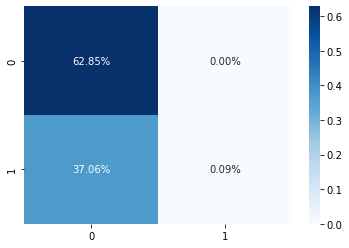

In [174]:
logreg_cm = confusion_matrix(test_y, log_reg_predict)
sns.heatmap(logreg_cm/np.sum(logreg_cm), annot = True, fmt = '0.2%', cmap = 'Blues')

## RidgeClassifier

In [178]:
from sklearn.linear_model import RidgeClassifier

In [179]:
ridge_reg = RidgeClassifier(random_state=1)

In [180]:
ridge_reg.fit(train_X, train_y)

RidgeClassifier(random_state=1)

In [182]:
ridge_reg_pred = ridge_reg.predict(test_X)

In [184]:
metrics.accuracy_score(test_y, ridge_reg_pred)

0.6284658040665434

In [186]:
print(classification_report(test_y, ridge_reg_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       680
           1       0.00      0.00      0.00       402

    accuracy                           0.63      1082
   macro avg       0.31      0.50      0.39      1082
weighted avg       0.39      0.63      0.49      1082



<AxesSubplot:>

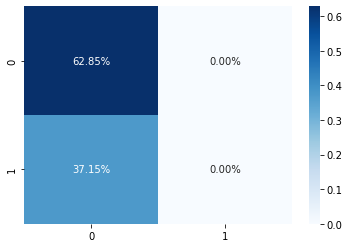

In [188]:
ridgereg_cm = confusion_matrix(test_y, ridge_reg_pred)
sns.heatmap(ridgereg_cm/np.sum(ridgereg_cm), annot = True, fmt = '0.2%', cmap = 'Blues')